<a href="https://colab.research.google.com/github/CappyCap17/dl_model/blob/main/plant_disease_classifier2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Project'

In [ ]:
import os

In [ ]:
dir_list = os.listdir(path)

In [ ]:
dir_list

['soil_classification.csv', 'Train', 'Test', 'Validation']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Defining training and test datasets

# Set image dimensions
img_width, img_height = 250, 250  # Adjusted based on the dataset

In [ ]:
# Define paths for training and test datasets
train_data_dir = '/content/drive/MyDrive/Project/Train/Train'  # training data path
test_data_dir = '/content/drive/MyDrive/Project/Test/Test'  # test data path

In [ ]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Data normalization for test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 1322 images belonging to 3 classes.


In [ ]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 150 images belonging to 3 classes.


In [ ]:
# Step 2: Build the CNN Model

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 3: Compile the Model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Step 4: Train the Model

# Including the use of EarlyStopping to stop training when validation loss is not decreasing
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,  # Changed 'test_data' to 'validation_data'
    validation_steps=test_generator.samples // test_generator.batch_size,  # Added 'validation_steps'
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 467s 10s/step - accuracy: 0.4530 - loss: 1.3158 - val_accuracy: 0.6875 - val_loss: 0.6682
Epoch 2/20
 1/41 ━━━━━━━━━━━━━━━━━━━━ 4:20 7s/step - accuracy: 0.7188 - loss: 0.7092

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.7188 - loss: 0.7092 - val_accuracy: 0.7727 - val_loss: 0.4714
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 332s 7s/step - accuracy: 0.7793 - loss: 0.5589 - val_accuracy: 0.7422 - val_loss: 0.7358
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8125 - loss: 0.5012 - val_accuracy: 0.7273 - val_loss: 0.6323
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 314s 7s/step - accuracy: 0.8291 - loss: 0.4988 - val_accuracy: 0.9062 - val_loss: 0.3594
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9375 - loss: 0.3357 - val_accuracy: 0.9091 - val_loss: 0.4632
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 304s 7s/step - accuracy: 0.8901 - loss: 0.3309 - val_accuracy: 0.8828 - val_loss: 0.3641
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8438 - loss: 0.2989 - val_accuracy: 0.9091 - val_loss: 0.2000
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 343s 8s/step - accuracy: 0.8741 - loss: 0.3661 - val_accuracy: 0.9219 - val_loss: 0.

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy:.2f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.9478 - loss: 0.1960
Test Accuracy: 0.93


Found 150 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step


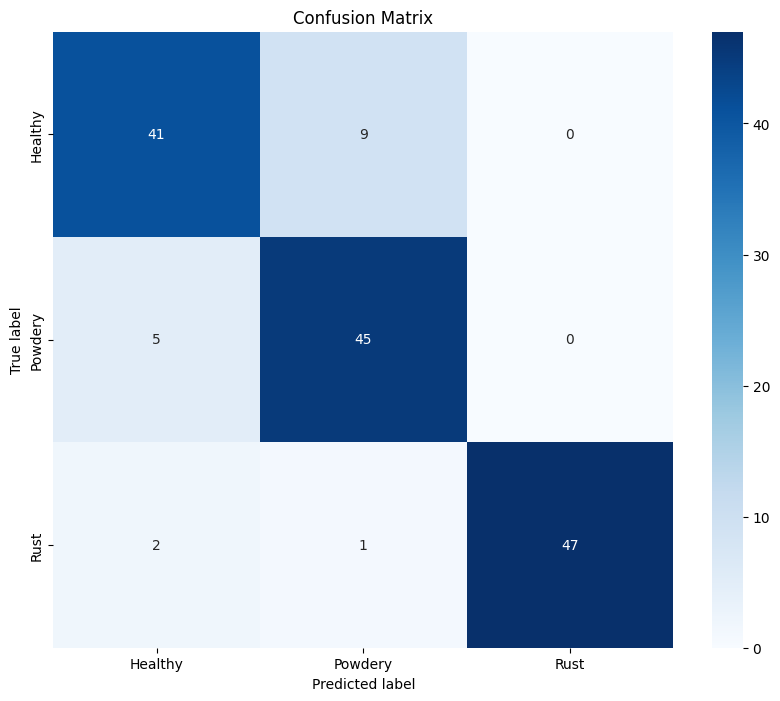

              precision    recall  f1-score   support

     Healthy       0.85      0.82      0.84        50
     Powdery       0.82      0.90      0.86        50
        Rust       1.00      0.94      0.97        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already loaded your test data using ImageDataGenerator
# Load test data
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of classes for confusion matrix
)

# Step 1: Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get true labels from the test generator
true_classes = test_generator.classes

# Step 3: Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Optionally print classification report
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

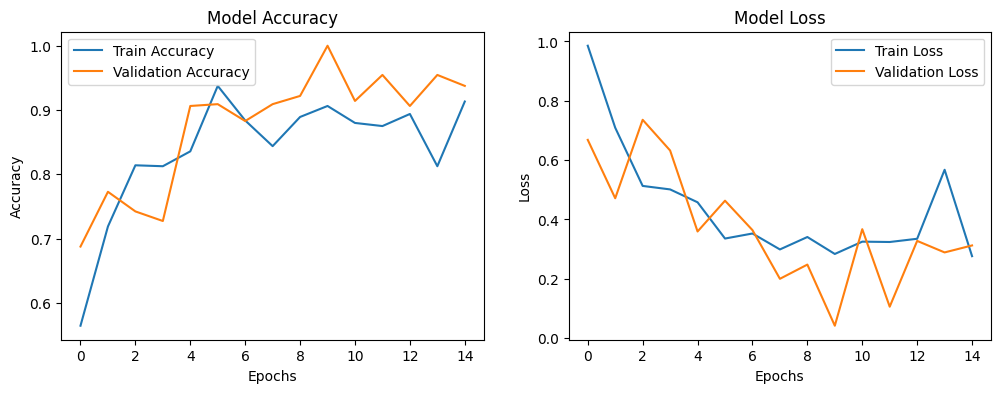

In [ ]:
# Step 5: Evaluate the Model

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()